In [6]:
# %pip install datasets
# %pip install accelerate -U

# 文本分类

In [4]:
from transformers import BertForSequenceClassification
from transformers import BertTokenizer
import torch

In [5]:
# !source /etc/network_turbo

In [6]:
model_name = 'IDEA-CCNL/Erlangshen-Roberta-110M-Sentiment'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)  # 预训练模型

vocab.txt: 100%|██████████| 110k/110k [00:00<00:00, 148kB/s]
config.json: 100%|██████████| 785/785 [00:00<00:00, 1.50MB/s]
pytorch_model.bin: 100%|██████████| 409M/409M [09:23<00:00, 726kB/s]  


In [7]:
texta = '鲸鱼是哺乳动物，所有哺乳动物都是恒温动物'
textb = '鲸鱼也是恒温动物'
output = model(torch.tensor([tokenizer.encode(texta, textb)]))
print(torch.nn.functional.softmax(output.logits, dim=-1))  # 测试一下

tensor([[0.0645, 0.9355]], grad_fn=<SoftmaxBackward0>)


准备数据集

In [8]:
from datasets import load_dataset, Features, Value

In [9]:
label_to_id = {  # 分类
    "升学": 0,
    "志愿": 1,
    "教务": 2,
    "思政": 3,
    "心理": 4,
    "灾害": 5,
    "作业与考试": 6,
    "竞赛与机会": 7,
    "企业参观与就业": 8,
    "生活": 9,
    "重要通知": 10,
    "垃圾与乐子": 11,
}

# 将label_to_id进行反转
id_to_label = {value: key for key, value in label_to_id.items()}
print(id_to_label)

{0: '升学', 1: '志愿', 2: '教务', 3: '思政', 4: '心理', 5: '灾害', 6: '作业与考试', 7: '竞赛与机会', 8: '企业参观与就业', 9: '生活', 10: '重要通知', 11: '垃圾与乐子'}


In [10]:
# 明确地定义CSV数据的特征描述
features = Features({
    '类别': Value('string'),
    '通知内容': Value('string')
})

# 使用提供的特征描述加载数据集
dataset = load_dataset('csv', data_files='../data/combined_data.csv', features=features)

# 预览数据集
print(dataset)

Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 1846.08it/s]
Generating train split: 307 examples [00:00, 55737.66 examples/s]

DatasetDict({
    train: Dataset({
        features: ['类别', '通知内容'],
        num_rows: 307
    })
})


In [11]:
def preprocess_function(batch):
    # 对通知内容进行分词，并返回结果
    encoding = tokenizer(batch['通知内容'], truncation=True, padding='max_length', max_length=128)  # 分词，截断，填充
    encoding["labels"] = [label_to_id[label] for label in batch["类别"]]  # 使用label_to_id将类别名转换为ID
    return encoding


# 使用map函数进行预处理
encoded_dataset = dataset['train'].map(preprocess_function, batched=True).train_test_split(test_size=0.05)

train_dataset = encoded_dataset['train']
test_dataset = encoded_dataset['test']

Map: 100%|██████████| 307/307 [00:00<00:00, 1056.04 examples/s]


In [12]:
# 输出训练集和测试集的大小
print(len(train_dataset))
print(len(test_dataset))

# 打印第一个样本的内容，带换行符
print(train_dataset[0])
# 输出：
# {'类别': '生活', '通知内容': '各位同学@所有人 今天晚上收到多名同学反馈在教学楼、活动中心和宿舍楼附近发现卖笔的人员，请大家不要轻信和购买，保护好自身财产安全', 'input_ids': [101, 1392, 855, 1398, 2110, 137, 2792, 3300, 782, 791, 1921, 3241, 677, 3119, 1168, 1914, 1399, 1398, 2110, 1353, 7668, 1762, 3136, 2110, 3517, 510, 3833, 1220, 704, 2552, 1469, 2162, 5650, 3517, 7353, 6818, 1355, 4385, 1297, 5011, 4638, 782, 1447, 8024, 6435, 1920, 2157, 679, 6206, 6768, 928, 1469, 6579, 743, 8024, 924, 2844, 1962, 5632, 6716, 6568, 772, 2128, 1059, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'labels': 9}

291
16
{'类别': '竞赛与机会', '通知内容': '@所有人 HAI（高性能人工智能）课题组招聘本科项目实习生，主要工作内容为利用自动机器学习技术搜索优化用于双目视觉和三维重建任务的深度学习网络模型，并部署在多种应用场景（云GPU，消费级GPU和边缘设备），效果显著的前提下可以发表学术论文。项目会根据同学的具体工作量发放酬劳。课题组氛围好，项目导师亲自指导项目实践，要求进项目组的同学具备一定编程能力，认真负责，主动积极学习，对三维视觉和人工智能领域有浓厚的兴趣。 项目导师：王强（http://faculty.hitsz.edu.cn/wangqiang） 联系方式：[qiang.wang@hit.edu.cn](mailto:qiang.wang@hit.edu.cn)', 'input_ids': [101, 137, 2792, 3300, 782, 11643, 8169, 8020, 7770, 2595, 5543, 782, 2339, 3255, 5543, 8021, 6440, 7579, 5299, 2875, 5470, 3315, 4906, 7555, 4680, 2141, 739, 4495, 8024, 712, 6206, 2339, 868, 1079, 2159, 711, 1164, 4500, 5632, 1220, 3322, 1690, 2110, 739, 2825, 3318, 3017, 5164, 831, 1265, 4500, 754, 1352, 4680, 6228, 6230, 1469, 676, 5335, 7028, 2456, 818, 1218, 4638, 3918, 2428, 2110, 739, 5381, 5317, 3563, 1798, 8024, 2400, 6956, 5392, 1762, 1914, 4905, 2418, 4500, 1767, 3250, 8020, 756, 9483, 8024, 3867, 6589, 5277, 9483, 1469, 6804, 5357, 6392, 1906, 8021, 8024, 3126, 3362, 3227, 5865, 4638, 1184, 2990, 678, 1377, 809, 1355, 

模型训练

In [13]:
# 修改模型输出
num_labels = len(label_to_id)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True)

# 打印模型的最后一层，验证是12分类
print(model.classifier)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at IDEA-CCNL/Erlangshen-Roberta-110M-Sentiment and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([12, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([12]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Linear(in_features=768, out_features=12, bias=True)


In [14]:
from transformers import Trainer, TrainingArguments

# 定义训练参数
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="steps",
    eval_steps=10,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=128,
    num_train_epochs=3,
    save_steps=50,
    logging_steps=20,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
)

# 创建Trainer对象
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=None,  # 如果你需要在验证时计算评估指标，请提供一个compute_metrics函数
)

In [15]:
# 开始训练
trainer.train()

 13%|█▎        | 2/15 [00:15<01:42,  7.91s/it]

In [ ]:
# 查看训练结果
trainer.log_metrics

<bound method log_metrics of <transformers.trainer.Trainer object at 0x2d08dd610>>

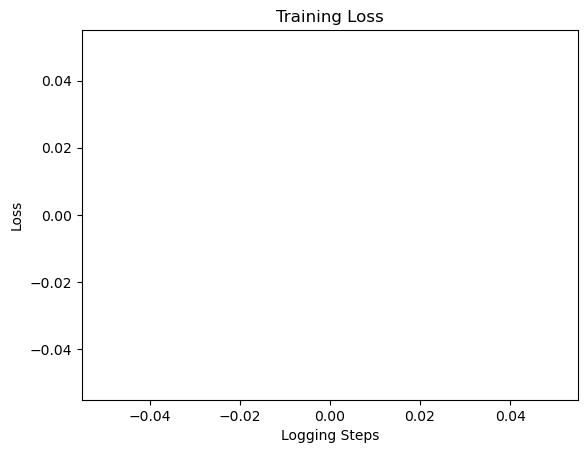

In [ ]:
import matplotlib.pyplot as plt

# 获取训练的历史
history = trainer.state.log_history

# 提取损失值
loss_values = [entry['loss'] for entry in history if 'loss' in entry]

# 绘制损失曲线
plt.plot(loss_values)
plt.title('Training Loss')
plt.xlabel('Logging Steps')
plt.ylabel('Loss')
plt.show()

In [ ]:
# 按日期时间保存模型
from datetime import datetime

# 获取当前日期和时间
now = datetime.now()
timestamp = now.strftime("%Y%m%d_%H%M%S")

# 使用日期和时间作为模型的保存名
model_save_path = f"./model_{timestamp}"
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to ./model_20230921_001504


## 评估模型

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

In [ ]:
# 加载模型
model_save_path = './model_20230915_145716'
model = BertForSequenceClassification.from_pretrained(model_save_path)
tokenizer = BertTokenizer.from_pretrained(model_save_path)

In [ ]:
label_to_id = {
    "升学": 0,
    "志愿": 1,
    "教务": 2,
    "思政": 3,
    "心理": 4,
    "灾害": 5,
    "作业与考试": 6,
    "竞赛与机会": 7,
    "企业参观与就业": 8,
    "生活": 9,
    "重要通知": 10,
    "垃圾与乐子": 11,
}

# 将label_to_id进行反转
id_to_label = {value: key for key, value in label_to_id.items()}
print(id_to_label)

{0: '升学', 1: '志愿', 2: '教务', 3: '思政', 4: '心理', 5: '灾害', 6: '作业与考试', 7: '竞赛与机会', 8: '企业参观与就业', 9: '生活', 10: '重要通知', 11: '垃圾与乐子'}


In [ ]:
def predict_label(text, model, tokenizer, id_to_label):
    # 对文本进行编码
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding='max_length', max_length=128)

    # 将输入移到模型所在的设备上
    inputs = {key: val.to(model.device) for key, val in inputs.items()}

    # 使用模型进行预测
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_label_id = logits.argmax(-1).item()

    # 获取预测的类别名
    predicted_label = id_to_label[predicted_label_id]

    return predicted_label

In [ ]:
# 使用这个函数
text = "【第九届中国国际“互联网+”大学生创新创业大赛】 《教育部关于举办第九届中国国际“互联网+”大学生创新创业大赛的通知》已发（[https://mp.weixin.qq.com/s/0j9OTd3Iv4uyqNhW9e6MRA），鼓励同学们积极报名，筹备比赛项目，具体学院比赛报名截止时间待校区和省教育厅通知后另行发布，谢谢大家。](https://mp.weixin.qq.com/s/0j9OTd3Iv4uyqNhW9e6MRA），请大家把此通知转发给同学们，鼓励同学们积极报名，筹备比赛项目，具体学院比赛报名截止时间待校区和省教育厅通知后另行发布，谢谢大家。)（咱们学校很多课程项目都可以拿到省赛铜奖，请大家积极报名） 此比赛也请大家积极挖掘自己的大一立项、大创国创项目、课程项目等。积极报名@所有人"
predicted_label = predict_label(text, model, tokenizer, id_to_label)
print(f"The predicted label for the text is: {predicted_label}")


The predicted label for the text is: 竞赛与机会
